Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [12]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle

First reload the data we generated in `1_notmnist.ipynb`.

In [96]:
data_root = '/Users/kmi_local/Documents/Work/projects/Udacity/tensorflow/tensorflow/examples/udacity/data' # Change me to store data elsewhere
pickle_file = data_root + '/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [97]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, tr_labels = reformat(train_dataset, train_labels)
valid_dataset, va_labels = reformat(valid_dataset, valid_labels)
test_dataset, te_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000,)
Validation set (10000, 784) (10000,)
Test set (10000, 784) (10000,)


In [15]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

In [17]:
# regularizing logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

n_samples= [50, 100, 1000, 5000, len(train_labels)]
n_sample= 5000
alpha_regs = [0.01, 0.1, 0.5, 0.8, 1, 10, 50, 100]
acc_train = []
acc_valid = []
acc_test = []
for alpha_reg in alpha_regs:
    print('############################## N-samples = ' + str(n_sample))
    tr_dataset, tr_label = train_dataset[0:n_sample], train_labels[0:n_sample]
    val_dataset, val_label = valid_dataset, valid_labels
    te_dataset, te_label = test_dataset, test_labels
    model = LogisticRegression(penalty="l2", C=alpha_reg)
    model.fit(tr_dataset,tr_label)
    expected = tr_label
    predicted = model.predict(tr_dataset)
    acc = metrics.accuracy_score(expected, predicted)
    acc_train.append(acc)
    print(acc)
    print('Training is finished - Validation started')
    print(model)
    # make predictions
    expected = val_label
    predicted = model.predict(val_dataset)
    acc = metrics.accuracy_score(expected, predicted)
    acc_valid.append(acc)
    print(acc)
    print('Validation is finished - Testing started')
    expected = te_label
    predicted = model.predict(te_dataset)
    acc = metrics.accuracy_score(expected, predicted)
    acc_test.append(acc)
    print(acc)
    #penalty l2 c = 1 - 0,85
    # c = 10 - 0.81
    # c = 100 - 0.78
    # c = 0.5 - 0.8587
print(acc_train)
print(acc_valid)
print(acc_test)


############################## N-samples = 5000
0.839
Training is finished - Validation started
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8083
Validation is finished - Testing started
0.8742
############################## N-samples = 5000
0.8874
Training is finished - Validation started
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8017
Validation is finished - Testing started
0.8728
############################## N-samples = 5000
0.9318
Training is finished - Validation started
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercep

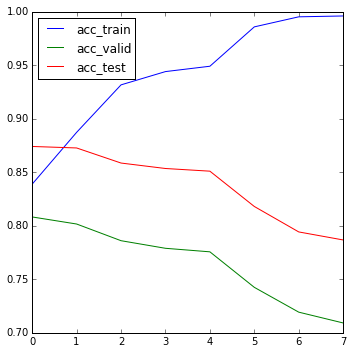

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
alpha_regs = [0.01, 0.1, 0.5, 0.8, 1, 10, 50, 100]
acc_tr = [0.83899999999999997, 0.88739999999999997, 0.93179999999999996, 0.94420000000000004, 0.94920000000000004, 0.98599999999999999, 0.99539999999999995, 0.99619999999999997]
acc_valid = [0.80830000000000002, 0.80169999999999997, 0.78610000000000002, 0.77900000000000003, 0.77569999999999995, 0.74250000000000005, 0.71930000000000005, 0.70920000000000005]
acc_test = [0.87419999999999998, 0.87280000000000002, 0.85870000000000002, 0.85360000000000003, 0.85109999999999997, 0.81810000000000005, 0.79430000000000001, 0.78680000000000005]
plt.figure(figsize=(5,5))
x = range(0, len(alpha_regs))
plt.plot(x, acc_tr, label = 'acc_train')
plt.plot(x, acc_valid, label = 'acc_valid')
plt.plot(x, acc_test, label = 'acc_test')
#plt.ylim([0.9,1.01])
plt.legend(loc = 0)
plt.tight_layout()
#plt.savefig("boxplot_BPMF_all.pdf", format='PDF')
plt.show()



Alpha = 0.01 for regularization performs the best for logistic clasification

In [35]:
# L2 norm for neural network classifier
batch_size = 128
hidden_size = 1024
beta = 0.001

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  weights = {
    'h1': tf.Variable(tf.truncated_normal([image_size * image_size, hidden_size])),
    'out': tf.Variable(tf.truncated_normal([hidden_size, num_labels]))
  }

  biases = {
    'h1': tf.Variable(tf.zeros([hidden_size])),
    'out': tf.Variable(tf.zeros([num_labels]))      
  }
    
  # Training computation.
  def get_logits(dataset_, weights, biases):      
      logits_1l = tf.nn.relu(tf.matmul(dataset_, weights['h1']) + biases['h1'])
      # 2nd layer logits
      output = tf.matmul(logits_1l, weights['out']) + biases['out']
      return output


  logits = get_logits(tf_train_dataset, weights, biases) 
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  regularizers = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])
  loss = tf.reduce_mean(loss + beta * regularizers)
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(get_logits(tf_valid_dataset, weights, biases))
  test_prediction = tf.nn.softmax(get_logits(tf_test_dataset, weights, biases))

In [24]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (tr_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = tr_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), va_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), te_labels))

Initialized
Minibatch loss at step 0: 31898.398438
Minibatch accuracy: 9.4%
Validation accuracy: 32.0%
Minibatch loss at step 500: 1.309123
Minibatch accuracy: 82.8%
Validation accuracy: 78.7%
Minibatch loss at step 1000: 1.436938
Minibatch accuracy: 72.7%
Validation accuracy: 77.9%
Minibatch loss at step 1500: 1.229286
Minibatch accuracy: 85.9%
Validation accuracy: 78.6%
Minibatch loss at step 2000: 1.370465
Minibatch accuracy: 74.2%
Validation accuracy: 70.5%
Minibatch loss at step 2500: 1.409223
Minibatch accuracy: 76.6%
Validation accuracy: 77.3%
Minibatch loss at step 3000: 1.494003
Minibatch accuracy: 69.5%
Validation accuracy: 75.5%
Test accuracy: 82.3%


without l2 the test accuracy was 89.5%


beta = 0.1 - > 82.3%

beta = 0.01 90.4%

beta = 0.001 leads to 92.9%

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

In [41]:
train_dataset2 = train_dataset[:128*2,:]    
tr_labels2 = tr_labels[:128*2]
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (tr_labels2.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset2[offset:(offset + batch_size), :]
    batch_labels = tr_labels2[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), va_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), te_labels))

Initialized
Minibatch loss at step 0: 692.887390
Minibatch accuracy: 13.3%
Validation accuracy: 34.3%
Minibatch loss at step 500: 190.609299
Minibatch accuracy: 100.0%
Validation accuracy: 63.1%
Minibatch loss at step 1000: 115.596161
Minibatch accuracy: 100.0%
Validation accuracy: 63.1%
Minibatch loss at step 1500: 70.103920
Minibatch accuracy: 100.0%
Validation accuracy: 63.2%
Minibatch loss at step 2000: 42.514793
Minibatch accuracy: 100.0%
Validation accuracy: 63.3%
Minibatch loss at step 2500: 25.783384
Minibatch accuracy: 100.0%
Validation accuracy: 63.5%
Minibatch loss at step 3000: 15.636644
Minibatch accuracy: 100.0%
Validation accuracy: 63.6%
Test accuracy: 69.6%


Minibatch accuracy: 100.0%
Validation accuracy: 63.6%
Test accuracy: 69.6% -> overfitting

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

In [67]:
# L2 norm for neural network classifier
batch_size = 128
hidden_size = 1024
beta = 0.001

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  keep_prob1 = tf.placeholder(tf.float32)
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  weights = {
    'h1': tf.Variable(tf.truncated_normal([image_size * image_size, hidden_size])),
    'out': tf.Variable(tf.truncated_normal([hidden_size, num_labels]))
  }

  biases = {
    'h1': tf.Variable(tf.zeros([hidden_size])),
    'out': tf.Variable(tf.zeros([num_labels]))      
  }
    
  # Training computation.
  def get_logits(dataset_, weights, biases, iftraining):      
      logits_1l = tf.nn.relu(tf.matmul(dataset_, weights['h1']) + biases['h1'])
      if iftraining:
            logits_1l = tf.nn.dropout(logits_1l, keep_prob = keep_prob1, seed = 100000)
      # 2nd layer logits
      output = tf.matmul(logits_1l, weights['out']) + biases['out']
      return output


  logits = get_logits(tf_train_dataset, weights, biases, True) 
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  regularizers = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])
  loss = tf.reduce_mean(loss + beta * regularizers)
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(get_logits(tf_valid_dataset, weights, biases, False))
  test_prediction = tf.nn.softmax(get_logits(tf_test_dataset, weights, biases, False))

In [54]:
train_dataset2 = train_dataset[:128*2,:]    
tr_labels2 = tr_labels[:128*2]
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (tr_labels2.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset2[offset:(offset + batch_size), :]
    batch_labels = tr_labels2[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob1: 0.5}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), va_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), te_labels))

Initialized
Minibatch loss at step 0: 774.206421
Minibatch accuracy: 9.4%
Validation accuracy: 25.1%
Minibatch loss at step 500: 190.987976
Minibatch accuracy: 100.0%
Validation accuracy: 69.9%
Minibatch loss at step 1000: 115.852623
Minibatch accuracy: 100.0%
Validation accuracy: 70.1%
Minibatch loss at step 1500: 70.389732
Minibatch accuracy: 99.2%
Validation accuracy: 69.5%
Minibatch loss at step 2000: 42.691452
Minibatch accuracy: 99.2%
Validation accuracy: 70.5%
Minibatch loss at step 2500: 25.845329
Minibatch accuracy: 100.0%
Validation accuracy: 70.8%
Minibatch loss at step 3000: 15.674263
Minibatch accuracy: 100.0%
Validation accuracy: 70.8%
Test accuracy: 78.5%


dropout improved the accuracy on limited amount of batches to 76.9%

together with L2 regularization to 78.5

In [57]:
# on the full training
train_dataset2 = train_dataset 
tr_labels2 = tr_labels
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (tr_labels2.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset2[offset:(offset + batch_size), :]
    batch_labels = tr_labels2[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob1 : 0.5}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), va_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), te_labels))


Initialized
Minibatch loss at step 0: 864.954102
Minibatch accuracy: 7.8%
Validation accuracy: 24.7%
Minibatch loss at step 500: 209.874924
Minibatch accuracy: 75.8%
Validation accuracy: 80.2%
Minibatch loss at step 1000: 119.488098
Minibatch accuracy: 71.1%
Validation accuracy: 80.2%
Minibatch loss at step 1500: 69.744682
Minibatch accuracy: 81.2%
Validation accuracy: 81.4%
Minibatch loss at step 2000: 41.487007
Minibatch accuracy: 86.7%
Validation accuracy: 83.5%
Minibatch loss at step 2500: 25.356237
Minibatch accuracy: 79.7%
Validation accuracy: 84.1%
Minibatch loss at step 3000: 15.563527
Minibatch accuracy: 84.4%
Validation accuracy: 85.0%
Test accuracy: 91.8%


with dropout and L2 regularization - test accuracy = 91.8%

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---


best performer: 'Hi, myself and Zhen Zhou from the LISA lab at Université de Montréal trained a couple of 4 layer MLPs with 1024-300-50 hidden neurons respectively. We divided the noisy set into 5/6 train 1/6 valid and kept the clean set for testing. We 97.1% accuracy on the test set at 412 epoch with early stopping, linear decay of the learning rate, a hard constraint on the norm of the weights and tanh activation units. We get approximately 93 on valid and 98 on train. The train set is easy to overfit (you can get 100% accuracy on train if you continue training). One could probably do better if they pursue hyper-optimization further. We used Torch 7.'

In [132]:
import math

batch_size = 128*3
hidden_size1 = 1024
hidden_size2 = 300
hidden_size3 = 50
beta = 0.0001
seed1 = 1000000

epochs = 20
stepsPerEpoch = float(train_dataset.shape[0]) / batch_size
num_steps = int(math.ceil(float(epochs) * stepsPerEpoch))
print('Numsteps = ' + str(num_steps))


graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  keep_prob1 = tf.placeholder(tf.float32)
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
   
  # Variables.
  weights = {
    'h1': tf.Variable(tf.truncated_normal([image_size * image_size, hidden_size1], 
                                                  stddev=np.sqrt(2.0 /float(image_size * image_size)))),
    'h2': tf.Variable(tf.truncated_normal([hidden_size1, hidden_size2],
                                                 stddev=np.sqrt(2.0 /float(hidden_size1)))), 
    'h3': tf.Variable(tf.truncated_normal([hidden_size2, hidden_size3],
                                                  stddev=np.sqrt(2.0 /float(hidden_size2)))),    
    'out': tf.Variable(tf.truncated_normal([hidden_size3, num_labels], stddev=np.sqrt(2.0 /float(hidden_size3))))
  }

  biases = {
    'h1': tf.Variable(tf.zeros([hidden_size1])),
    'h2': tf.Variable(tf.zeros([hidden_size2])),
    'h3': tf.Variable(tf.zeros([hidden_size3])),
    'out': tf.Variable(tf.zeros([num_labels]))      
  }
    
  # Training computation.
  def get_logits(dataset_, weights, biases, iftraining):  
      # 1st layer  
      logits_1l = tf.nn.relu(tf.matmul(dataset_, weights['h1']) + biases['h1'])
      if iftraining:
            logits_1l = tf.nn.dropout(logits_1l, keep_prob = keep_prob1)
        
      # 2nd layer 
      logits_2l = tf.nn.relu(tf.matmul(logits_1l, weights['h2']) + biases['h2'])
      if iftraining:
            logits_2l = tf.nn.dropout(logits_2l, keep_prob = keep_prob1)
          
      # 3d layer 
      logits_3l = tf.nn.relu(tf.matmul(logits_2l, weights['h3']) + biases['h3'])
      if iftraining:
            logits_3l = tf.nn.dropout(logits_3l, keep_prob = keep_prob1)    
            
      output = tf.matmul(logits_3l, weights['out']) + biases['out']
      return output


  logits = get_logits(tf_train_dataset, weights, biases, True) 
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  regularizers = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2']) + tf.nn.l2_loss(weights['h3'])+ tf.nn.l2_loss(weights['out'])
  loss = tf.reduce_mean(loss + beta * regularizers)
  
  # Optimizer.
  # Decaying learning rate
  global_step = tf.Variable(0, trainable=False)
  learning_rate = tf.train.exponential_decay(0.5, global_step, int(stepsPerEpoch) * 2, 0.96, staircase = True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(get_logits(tf_valid_dataset, weights, biases, False))
  test_prediction = tf.nn.softmax(get_logits(tf_test_dataset, weights, biases, False))

Numsteps = 7813


In [133]:
#num_steps = 68500#because of early stopping when changed of validation speed are not that good

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (tr_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = tr_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob1 : 0.5}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), va_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), te_labels))



Initialized
Minibatch loss at step 0: 2.971110
Minibatch accuracy: 8.6%
Validation accuracy: 22.1%
Minibatch loss at step 500: 0.687511
Minibatch accuracy: 84.4%
Validation accuracy: 85.2%
Minibatch loss at step 1000: 0.574256
Minibatch accuracy: 86.3%
Validation accuracy: 86.5%
Minibatch loss at step 1500: 0.494567
Minibatch accuracy: 87.7%
Validation accuracy: 87.4%
Minibatch loss at step 2000: 0.647672
Minibatch accuracy: 85.7%
Validation accuracy: 87.8%
Minibatch loss at step 2500: 0.594436
Minibatch accuracy: 84.8%
Validation accuracy: 88.3%
Minibatch loss at step 3000: 0.526566
Minibatch accuracy: 87.1%
Validation accuracy: 88.6%
Minibatch loss at step 3500: 0.519134
Minibatch accuracy: 87.7%
Validation accuracy: 89.1%
Minibatch loss at step 4000: 0.459138
Minibatch accuracy: 88.9%
Validation accuracy: 89.2%
Minibatch loss at step 4500: 0.444568
Minibatch accuracy: 89.3%
Validation accuracy: 89.2%
Minibatch loss at step 5000: 0.523772
Minibatch accuracy: 84.8%
Validation accuracy

batch_size = 128*2

Test accuracy: 94.6% with 6 epochs

Test accuracy: 95.2% with 10 epochs

batch_size = 128

Test accuracy: 94.8%

with early stopping by n_steps = 7000

Test accuracy: 93.8%

batch_size = 128*3

epochs = 20

Test accuracy: 95.7%

epochs = 40

Test accuracy: 96.1%

epochs = 60

Test accuracy: 96.4%

epochs = 100

Test accuracy: 96.7%

epochas = 200

Test accuracy: 96.8%

num_steps = 68500 due to the early stopping

Test accuracy: 96.8%